In [10]:
import json
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statistics
# Path to your JSON file
file_path = 'dataset/reviews.json'

Counting decisions
decision_counts = {
    'accept': 0,
    'probably reject': 0,
    'reject': 0,
    'no decision': 0
}

# Lists to store the feature data
evaluations = []
confidences = []
orientations = []
missingValuesPositions = []
nullValuesCount= 0


with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 
for paper in data['paper']:
    print("Paper ID:", paper['id'])
    decision = paper['preliminary_decision'].lower()  
    print("Preliminary Decision:", decision)

    
    if decision in decision_counts:
        decision_counts[decision] += 1
    else:
        decision_counts[decision] = 1

    print("Reviews:")
    for review in paper['review']:
        print("  Review ID:", review['id'])
        print("  Evaluation:", review['evaluation'])
        print("  Confidence:", review['confidence'])
        print("  Date:", review['timespan'])
        print("")
    print()  
    
    


Paper ID: 1
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 1
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: 1
  Confidence: 4
  Date: 2010-07-05

  Review ID: 3
  Evaluation: 1
  Confidence: 5
  Date: 2010-07-05


Paper ID: 2
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 3
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05


Paper ID: 3
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: 2
  Confidence: 3
  Date: 2010-07-05

  Review ID: 3
  Evaluation: 0
  Confidence: 3
  Date: 2010-07-05


Paper ID: 4
Preliminary Decision: accept
Reviews:
  Review ID: 1
  Evaluation: 2
  Confidence: 4
  Date: 2010-07-05

  Review ID: 2
  Evaluation: -2
  Confidence: 2
  Date: 2010-07-05


Paper ID: 5
Preliminary Decision: accept
Reviews:
  Review

In [11]:
# For finding the median confidence
for paper in data['paper']:
    for review in paper['review']:
        if 'confidence' in review and review['confidence'] is not None:
            confidences.append(int(review['confidence']))


medianConfidence = np.median(confidences)  

In [14]:
#This section is for datacollection
#The dataset is found here ---->   https://archive.ics.uci.edu/dataset/410/paper+reviews
#The dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license


evaluations = []
confidences = []
orientations = []
decisions = []


decisionMapping = {
    "no decision": 0,  
    "accept": 1,
    "probably reject": 2,
    "reject": 3
}

for paper in data['paper']:
    paperDecision = paper['preliminary_decision']
    # Converting the decision, in text, into integers
    
    decisionCode = decisionMapping.get(paperDecision, 0)  

    for review in paper['review']:
        if 'evaluation' in review and review['evaluation'] is not None:
            evaluations.append(int(review['evaluation']))
        else:
            nullValuesCount += 1

        if 'confidence' in review and review['confidence'] is not None:
            confidences.append(int(review['confidence']))
        else:
            nullValuesCount += 1
            confidences.append(int(medianConfidence))  

        if 'orientation' in review and review['orientation'] is not None:
            orientations.append(int(review['orientation']))
        else:
            nullValuesCount += 1
        
        # Append the decision for each review
        decisions.append(decisionCode)

for paper in data['paper']:
    for review in paper['review']:
        if 'decision' in review:
            
            decisionClass = review['decision']
        else:
            decisionClass = 0  

       # decisions.append(decisionClass)



#for paper in data['paper']:
#    print(r"Paper ID:", paper['id'])
#    for review in paper['review']:
#        print(r"Review nr:", review['id'])
#        if 'evaluation' in review:
#            if review['evaluation'] is not None:
#                evaluations.append(int(review['evaluation']))
#            else:
#                nullValuesCount = nullValuesCount + 1
#
#                
#                
#        if 'confidence' in review:
#            if review['confidence'] is not None:
#                confidences.append(int(review['confidence']))
#            else:
#                nullValuesCount = nullValuesCount + 1
#                confidences.append(int(medianConfidence))
#                
#
#
#
#        if 'orientation' in review:
#            if review['orientation'] is not None:
#                orientations.append(int(review['orientation']))
#            else:
#                nullValuesCount = nullValuesCount + 1

print(f"There are combined {nullValuesCount} null values for orientation, confidence and evaluation.")

evaluations_np = np.array(evaluations)
meanEvaluation = np.mean(evaluations_np)
medianEvaluation = np.median(evaluations_np)
modeEvaluation = statistics.mode(evaluations_np)
stdDevEvaluation = np.std(evaluations_np)
q1Evaluation = np.percentile(evaluations_np, 25)
q3Evaluation = np.percentile(evaluations_np, 75)


confidencesArray = np.array(confidences)
meanConfidence = np.mean(confidencesArray)
medianConfidence = np.median(confidencesArray)
modeConfidence = statistics.mode(confidencesArray)
stdDevConfidence = np.std(confidencesArray)
q1Confidence = np.percentile(confidencesArray, 25)
q3Confidence = np.percentile(confidencesArray, 75)

print(f"The length of 'confidences' is {len(confidences)}")
print(f"The length of 'evaluations' is {len(evaluations)}")
print(int(medianConfidence))

# Print the counts of each decision
print("Decision Counts:")
for decision, count in decision_counts.items():
    print(f"  {decision.title()}: {count}")
    
    
    
#Printing the data we want:

print(f"These are the decisions {decisions}")
print("Evaluation Statistics:")
print(f"Mean: {meanEvaluation}, Median: {medianEvaluation}, Mode: {modeEvaluation}, Std Dev: {stdDevEvaluation}, Q1: {q1Evaluation}, Q3: {q3Evaluation}")

print("Confidence Statistics:")
print(f"Mean: {meanConfidence}, Median: {medianConfidence}, Mode: {meanConfidence}, Std Dev: {stdDevConfidence}, Q1: {q1Confidence}, Q3: {q3Confidence}")

There are combined 4 null values for orientation, confidence and evaluation.
The length of 'confidences' is 405
The length of 'evaluations' is 405
4
Decision Counts:
  Accept: 115
  Probably Reject: 7
  Reject: 48
  No Decision: 2
These are the decisions [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 

{0: 'no decision', 1: 'accept', 2: 'probably reject', 3: 'reject'}


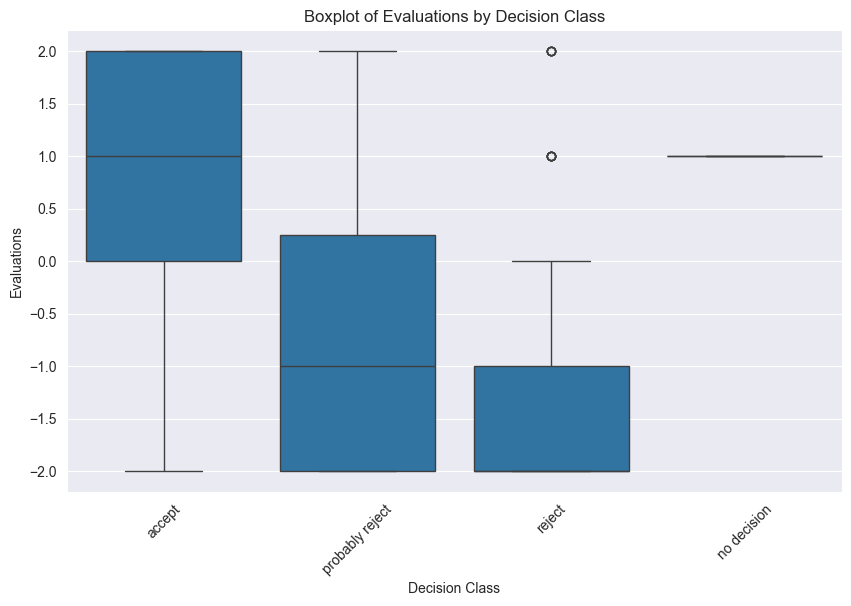

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 

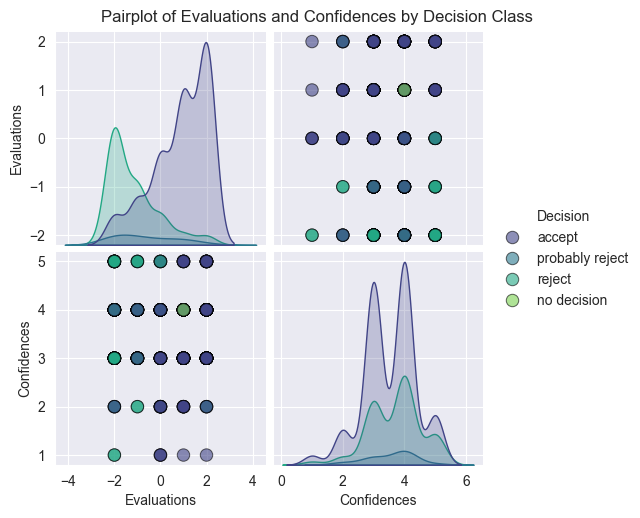

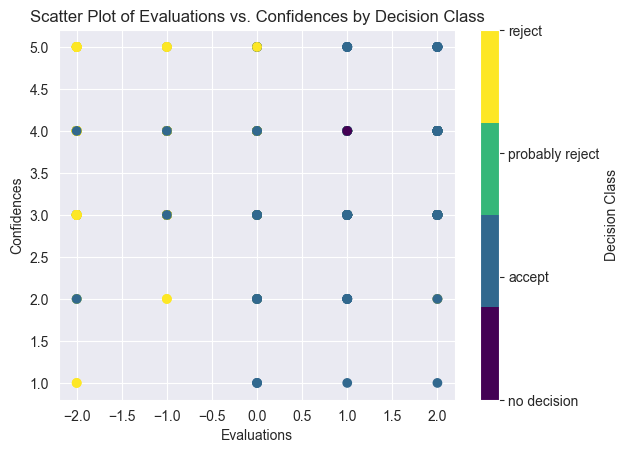

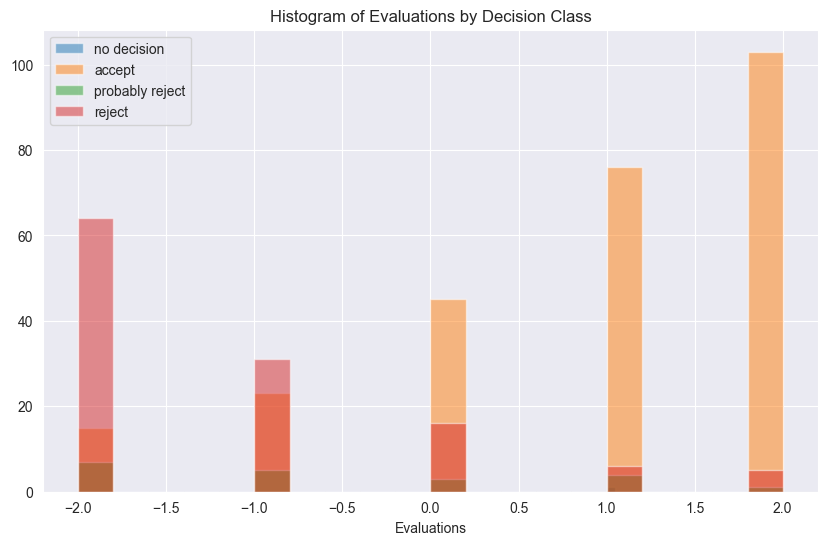

C:\Users\hanur\AppData\Local\Temp\ipykernel_13896\3753658457.py:70: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot([evaluations[i] for i in range(len(evaluations)) if decisions[i] == decisionCode], label=label)


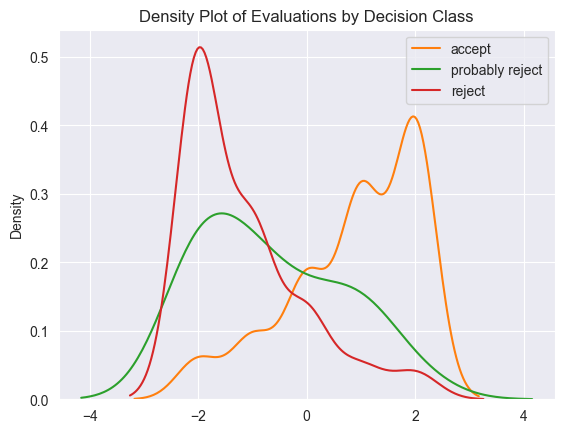

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#This is used for converting the numerical decision classes back to text for having labels in text form
reverseDecisionMapping = {value: key for key, value in decisionMapping.items()}
decision_labels = [reverseDecisionMapping[decision] for decision in decisions]

print(reverseDecisionMapping)

data_df = pd.DataFrame({
    'Decision': decision_labels,
    'Evaluations': evaluations,
    'Confidences': confidences
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Decision', y='Evaluations', data=data_df)  
plt.title('Boxplot of Evaluations by Decision Class')
plt.ylabel('Evaluations')  # or 'Confidences'
plt.xlabel('Decision Class')
plt.xticks(rotation=45)  
plt.show()

print(decisions)
print(f"Decisions length : {len(decisions)}, evaluations length : {len(evaluations)}, confidences length : {len(confidences)}")


# Creating the scatter plot
# Pairplots used to find correlations in the scatter plots
# This plots every numeric column against every other numeric column and colors points by 'Decision'


pairplotFigure = sns.pairplot(data_df, hue='Decision', palette='viridis',
                            plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'})
pairplotFigure.fig.suptitle('Pairplot of Evaluations and Confidences by Decision Class', y=1.02)
plt.show()






cmap = plt.get_cmap('viridis', len(reverseDecisionMapping))
norm = plt.Normalize(vmin=0, vmax=len(reverseDecisionMapping) - 1)


scatter = plt.scatter(evaluations, confidences, c=decisions, cmap=cmap, norm=norm)
plt.title('Scatter Plot of Evaluations and Confidences by Decision Class')
plt.xlabel('Evaluations')
plt.ylabel('Confidences')



# Creating the histogram
plt.figure(figsize=(10, 6)) 
for decisionCode in set(decisions):
    label = reverseDecisionMapping[decisionCode]  
    plt.hist([evaluations[i] for i in range(len(evaluations)) if decisions[i] == decisionCode], bins=20, alpha=0.5, label=label)
plt.title('Histogram of Evaluations by Decision Class')
plt.xlabel('Evaluations')
plt.legend()
plt.show()



# Creating the Density Plot
for decisionCode in set(decisions):
    label = reverseDecisionMapping[decisionCode]  
    sns.kdeplot([evaluations[i] for i in range(len(evaluations)) if decisions[i] == decisionCode], label=label)
plt.title('Density Plot of Evaluations by Decision Class')
plt.legend()
plt.show()


In [6]:
#This section is for linear and Lasso regression
#predicting the decisions classification based on evaluation
#This works
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

print(evaluations)
print(decisions)

#Dataframe of features
df = pd.DataFrame({
    'Evaluation': evaluations,
    'Confidence': confidences,
    'Orientation': orientations,
    'Decision': decisions
})


X = np.array(df['Decision']).reshape(-1, 1)  
y = np.array(df['Evaluation']) 

# Splitting the dataset into training and testing sets
trainingProportion = 0.62
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=1.0 - trainingProportion, random_state=42)

# We also create a linear regression model for comparing the two
linearModel = LinearRegression()
linearModel.fit(xTrain, yTrain)
linearPred = linearModel.predict(xTest)

#MSE (mean squared error) is a meausurement on difference between the observed actual outcomes and the predicted outcomes.
#We want the MSE to be as close to 0 as possible

#R-squared, also known as the coefficient of determination, measures the proportion of the variance


# MSE and R^2 for linear model
linearMSE = mean_squared_error(yTest, linearPred)
linearR2 = r2_score(yTest, linearPred)


#For tuning the Lasso model we can edit the alpha parameter
#We can also apply scaling of input features
#Alpha is the regularization parameter
# Lasso model

lassoModel = Lasso(alpha=5)
lassoModel.fit(xTrain, yTrain)
lassoPred = lassoModel.predict(xTest)

# MSE and R^2 for linear model
lassoMSE = mean_squared_error(yTest, lassoPred)
lassoR2 = r2_score(yTest, lassoPred)

# Plotting the Linear and Lasso Regression
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='green', label='Actual data points', alpha=0.5)
plt.plot(xTest, linearPred, color='red', label='Linear Regression Line')
plt.plot(xTest, lassoPred, color='blue', label='Lasso Regression Line', linestyle='--')
plt.xlabel("Decisions")
plt.ylabel("Evaluations")
plt.title("Lasso regression")
plt.legend()
plt.show()

# Finding the size of the training set
totalDataSize = len(df)
trainSize = len(xTrain)
testSize = len(xTest)
trainPercentage = (trainSize / totalDataSize) * 100
testPercentage = (testSize / totalDataSize) * 100

print('For this test:')
print(f"Total data size: {totalDataSize}")
print(f"Training data size: {trainSize}, which is ({trainPercentage}%)")
print(f"Testing data size: {testSize}, which is ({testPercentage}%)")

print('')

print(f'In this test {trainingProportion*100}% of of the data (')
print(f'MSE for linear regression model: {linearMSE}')
print(f'R² Score for linear regression model: {linearR2}')
print(f'MSE for lasso model: {lassoMSE}')
print(f'R² Score for lasso model: {lassoR2}')

[]
[]


ValueError: With n_samples=0, test_size=0.38 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [5]:
#Gathering the regression stats

yTrainLassoreg = pd.Series(yTrain)
yTestLassoreg = pd.Series(yTest)

dataRange = [-2, -1, 0 ,1 ,2]


trainClasses = pd.cut(yTrainLassoreg, dataRange, include_lowest=False, right=False)
testClasses = pd.cut(yTestLassoreg, dataRange, include_lowest=False, right=False)


trainClassDistribution = trainClasses.value_counts().sort_index()
trainClassPercentage = trainClassDistribution / len(yTrainLassoreg) * 100

testClassDistribution = testClasses.value_counts().sort_index()
testClassPercentage = testClassDistribution / len(yTestLassoreg) * 100


print('')
print('Training Class Distr:')

print(trainClassDistribution)

print('')
print('Training Perc:')

print(trainClassPercentage)


print('')
print('Test dist:')

print(testClassDistribution)

print('')

print('Test Perce:')
print(testClassPercentage)



print('Training stats:')
print(yTrainLassoreg.describe())

print('')

print('Frequency of each unique value in the training data:')
print(yTrainLassoreg.value_counts().sort_index())

print('')


print('Test stats')
print(yTestLassoreg.describe())

print('')

print('Frequency of each value in the test data:')
print(yTestLassoreg.value_counts().sort_index())

NameError: name 'yTrain' is not defined

Coefficients: 
 [ 0.7094228  -0.10324804]
Intercept: 
 -0.9715712752027931


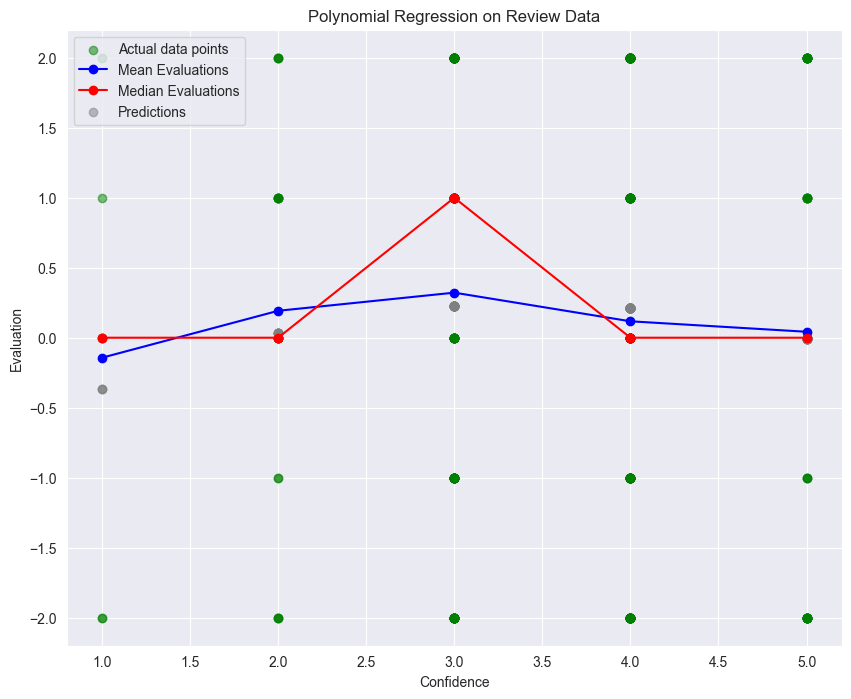

Mean Squared Error: 2.2288121768465485
R² Score: -0.007551721797540489


In [6]:
#This section is for linear regression
#This works
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

X = np.array(confidences).reshape(-1, 1)
y = np.array(evaluations)

# Creating a DataFrame
data_df = pd.DataFrame({
    'Confidence': confidences,
    'Evaluation': evaluations
})

# Finding the mean and median for every confidence level
#This is used for, in the end, evaluate the regression line

meanEvaluations = data_df.groupby('Confidence').Evaluation.mean().reset_index()
medianEvaluations = data_df.groupby('Confidence').Evaluation.median().reset_index()

polyFeatures = PolynomialFeatures(degree=2, include_bias=False)
XPoly = polyFeatures.fit_transform(X)

# Here we are splitting the dataset into training and testing sets
trainingProportion = 0.7
xTrain, xTest, yTrain, yTest = train_test_split(XPoly, y, test_size=1.0 - trainingProportion, random_state=42)

# Here we initialize and train the model
model = LinearRegression()
model.fit(xTrain, yTrain)


yPred = model.predict(xTest)


mse = mean_squared_error(yTest, yPred)
r2 = r2_score(yTest, yPred)

print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)

# Plotting
plt.figure(1, (10,8))
plt.scatter(X, y, color='green', label='Actual data points', alpha=0.5)
plt.plot(meanEvaluations['Confidence'], meanEvaluations['Evaluation'], 'bo-', label='Mean Evaluations')
plt.plot(medianEvaluations['Confidence'], medianEvaluations['Evaluation'], 'ro-', label='Median Evaluations')
plt.scatter(xTest[:, 0], yPred, color='grey', label='Predictions', alpha=0.5)
plt.xlabel("Confidence")
plt.ylabel("Evaluation")
plt.title("Polynomial Regression on Review Data")
plt.legend()
plt.show()

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 1.155007225714946
R^2 Score: 0.46201289643617616
For this test:
Total data size: 405
Training data size: 251, which is (61.97530864197531%)
Testing data size: 154, which is (38.02469135802469%)


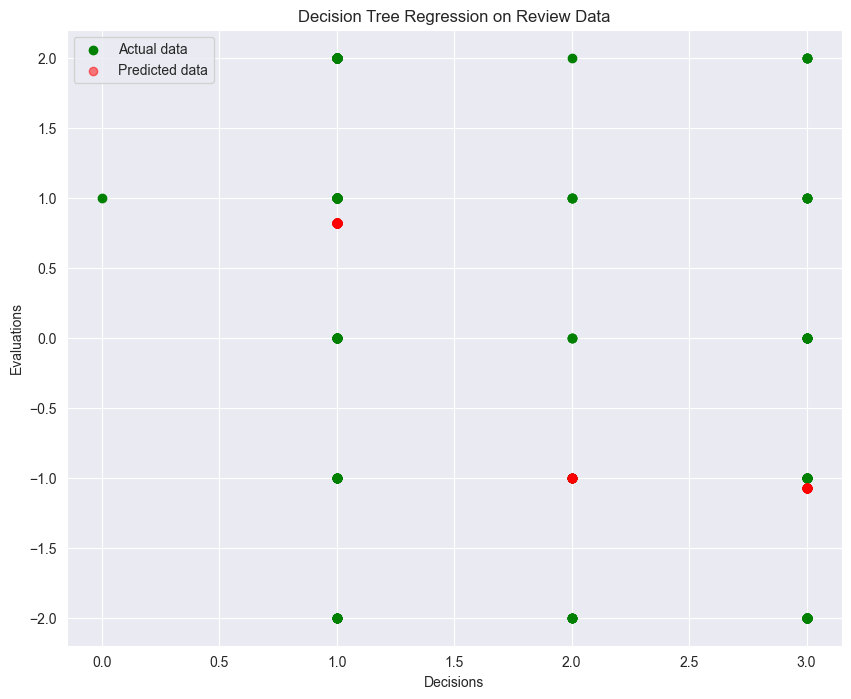

In [46]:
#This section is for the Decision Tree model
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz


df = pd.DataFrame({
    'Evaluation': evaluations,
    'Confidence': confidences,
    'Orientation': orientations,
    'Decision': decisions
})


X = np.array(df['Decision']).reshape(-1, 1)  
y = np.array(df['Evaluation']) 

#The Decision Tree model has plenty of Hyperparameters.


treeModel = DecisionTreeRegressor(
    max_depth=99999999999999,
    min_samples_split=10,
    min_samples_leaf=6,
    max_features=None,
    max_leaf_nodes=200000000,
    min_impurity_decrease=0.000000000000000000000000001,
    splitter='best',
    random_state=42
)

trainingProportion = 0.62
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=1.0 - trainingProportion, random_state=42)

# Training the model
treeModel.fit(xTrain, yTrain)


yPredTree = treeModel.predict(xTest)


mseTree = mean_squared_error(yTest, yPredTree)
r2Tree = r2_score(yTest, yPredTree)
print(f'Mean Squared Error: {mseTree}')
print(f'R^2 Score: {r2Tree}')

dot_data = export_graphviz(treeModel, filled=True, rounded=True, special_characters=True)

totalDataSize = len(df)
trainSize = len(xTrain)
testSize = len(xTest)
trainPercentage = (trainSize / totalDataSize) * 100
testPercentage = (testSize / totalDataSize) * 100

print('For this test:')
print(f"Total data size: {totalDataSize}")
print(f"Training data size: {trainSize}, which is ({trainPercentage}%)")
print(f"Testing data size: {testSize}, which is ({testPercentage}%)")




graph = graphviz.Source(dot_data, format="png") 
graph



plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='green', label='Actual data')
plt.scatter(xTest, yPredTree, color='red', label='Predicted data', alpha=0.5)
plt.xlabel("Decisions")
plt.ylabel("Evaluations")
plt.title("Decision Tree Regression on Review Data")
plt.legend()
plt.show()


Mean Squared Error: 0.6714691227413203
R^2 Score: 0.6872385553670133


For this test:
Total data size: 405
Training data size: 251, which is (61.97530864197531%)
Testing data size: 154, which is (38.02469135802469%)


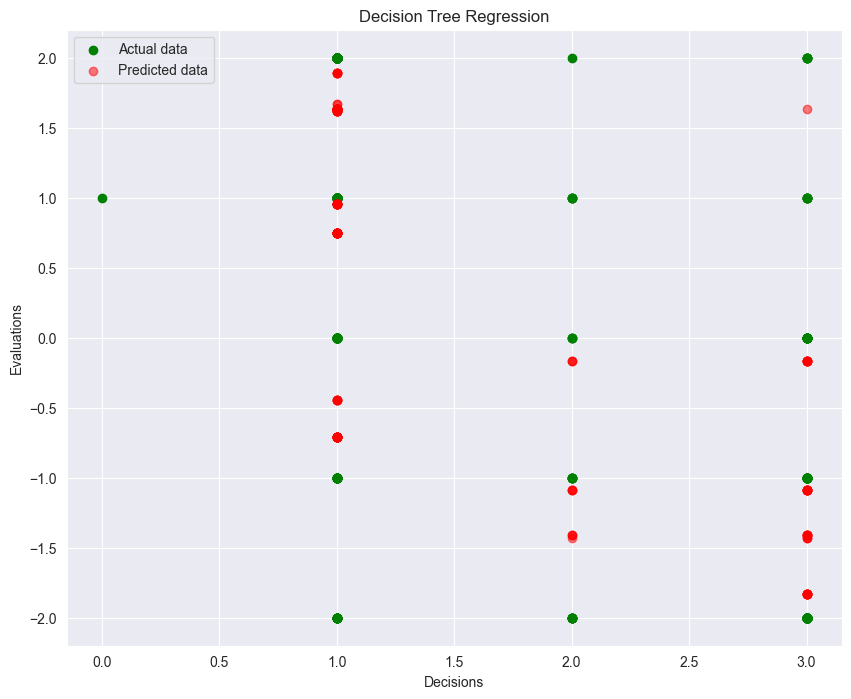

In [17]:
#This section is for the Decision Tree model
#By using all features in matrix
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
import pandas as pd
import graphviz


df = pd.DataFrame({
    'Evaluation': evaluations,
    'Confidence': confidences,
    'Orientation': orientations,
    'Decision': decisions
})


X = df[['Confidence', 'Orientation', 'Decision']]  
y = df['Evaluation']

#The Decision Tree model has plenty of Hyperparameters.


treeModel = DecisionTreeRegressor(
    max_depth=9999,
    min_samples_split=10,
    min_samples_leaf=6,
    max_features=None,
    max_leaf_nodes=200000000,
    min_impurity_decrease=0.000000000000000000000000001,
    splitter='best',
    random_state=42
)

trainingProportion = 0.62
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=1.0 - trainingProportion, random_state=42)


treeModel.fit(xTrain, yTrain)


yPredTree = treeModel.predict(xTest)


mseTree = mean_squared_error(yTest, yPredTree)
r2Tree = r2_score(yTest, yPredTree)
print(f'Mean Squared Error: {mseTree}')
print(f'R^2 Score: {r2Tree}')
dot_data = export_graphviz(treeModel, filled=True, rounded=True, special_characters=True)


#Finding the size of the training set
totalDataSize = len(df)
trainSize = len(xTrain)
testSize = len(xTest)
trainPercentage = (trainSize / totalDataSize) * 100
testPercentage = (testSize / totalDataSize) * 100

print('')
print('')



print('For this test:')
print(f"Total data size: {totalDataSize}")
print(f"Training data size: {trainSize}, which is ({trainPercentage}%)")
print(f"Testing data size: {testSize}, which is ({testPercentage}%)")


graph = graphviz.Source(dot_data, format="png") 
graph



plt.figure(figsize=(10, 8))
plt.scatter(X['Decision'], y, color='green', label='Actual data') 
plt.scatter(xTest['Decision'], yPredTree, color='red', label='Predicted data', alpha=0.5) 
plt.xlabel("Decisions")
plt.ylabel("Evaluations")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [18]:
#Showing the distrobution stats:


trainClassDistribution = yTrain.value_counts()
testClassDistribution = yTest.value_counts()


trainClassPercentage = (trainClassDistribution / len(yTrain)) * 100
testClassPercentage = (testClassDistribution / len(yTest)) * 100

print("Training set class distribution:")
print(trainClassDistribution)
print("Training set class percentages:")
print(trainClassPercentage)

print("Test set class distribution:")
print(testClassDistribution)
print("Test set class percentages:")
print(testClassPercentage)


print("Training set class distribution:")
print(trainClassDistribution)
print("Training set class percentages:")
print(trainClassPercentage)

print("\nTest set class distribution:")
print(testClassDistribution)
print("Test set class percentages:")
print(testClassPercentage)

Training set class distribution:
Evaluation
 2    68
-2    56
 1    51
-1    39
 0    37
Name: count, dtype: int64
Training set class percentages:
Evaluation
 2    27.091633
-2    22.310757
 1    20.318725
-1    15.537849
 0    14.741036
Name: count, dtype: float64

Test set class distribution:
Evaluation
 2    41
 1    36
-2    30
 0    27
-1    20
Name: count, dtype: int64

Test set class percentages:
Evaluation
 2    26.623377
 1    23.376623
-2    19.480519
 0    17.532468
-1    12.987013
Name: count, dtype: float64
Training set class distribution:
Evaluation
 2    68
-2    56
 1    51
-1    39
 0    37
Name: count, dtype: int64

Training set class percentages:
Evaluation
 2    27.091633
-2    22.310757
 1    20.318725
-1    15.537849
 0    14.741036
Name: count, dtype: float64

Test set class distribution:
Evaluation
 2    41
 1    36
-2    30
 0    27
-1    20
Name: count, dtype: int64

Test set class percentages:
Evaluation
 2    26.623377
 1    23.376623
-2    19.480519
 0    1